## <span style="color:#0b486b">Deep Neural Networks (DNN) for Image Classification </span>
<div style="text-align: right"><span style="color:red; font-weight:bold"><span></div>
    
### Developer: Mayana Mohsin Khan

**This notebook demonstrate the basis knowledge in TF 1.x and feedforward neural networks.**

**Dataset: `FashionMNIST` dataset for `image recognition task`. It has the exact same format as MNIST (70,000 grayscale images of 28 × 28 pixels each, with 10 classes), but the images represent fashion items rather than handwritten digits, so each class is more diverse, and the problem turns out to be significantly more challenging than MNIST.**

####  <span style="color:red"></span> Load the Fashion MNIST using Keras datasets

We first use keras incoporated in TensorFlow 2.x for loading the training and testing sets.

In [7]:
import tensorflow as tf
from tensorflow import keras

We first use keras datasets in TF 2.x to load Fashion MNIST dataset.

In [8]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full_img, y_train_full), (X_test_img, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


The shape of X_train_full_img is $(60000, 28, 28 )$ and that of X_test_img is $(10000, 28, 28)$. We next convert them to matrices of vectors and store in X_train_full and X_test.

In [9]:
num_train = X_train_full_img.shape[0]
num_test = X_test_img.shape[0]
X_train_full =  X_train_full_img.reshape(num_train, 28*28)
X_test = X_test_img.reshape(num_test, 28*28) 
print(X_train_full.shape, y_train_full.shape)
print(X_test.shape, y_test.shape)

(60000, 784) (60000,)
(10000, 784) (10000,)


####  <span style="color:red"></span> Preprocess the dataset and split into training, validation, and testing datasets

The Following code addresses the below requirments for the dataset:
- Use $10 \%$ of X_train_full for validation and the rest of X_train_full for training. This splits X_train_full and y_train_full into X_train, y_train ($90 \%$) and X_valid, y_valid ($10 \%$).
- Finally, scale the piels of X_train, X_valid, and X_test to $[0,1]$) (i.e., $X = X/255.0$).


In [10]:
import math
N = X_train_full.shape[0]
i = math.floor(0.9*N)
index = np.random.permutation(N)
X_train, y_train = X_train_full[index[:i]], y_train_full[index[:i]]
X_valid, y_valid = X_train_full[index[i:]], y_train_full[index[i:]]
X_train, X_valid, X_test = X_train/255.0, X_valid/255.0, X_test/255.0

Now, we have separated training, validation, and testing sets for training your model.

####  <span style="color:red"></span> Visualize some images in the training set with labels

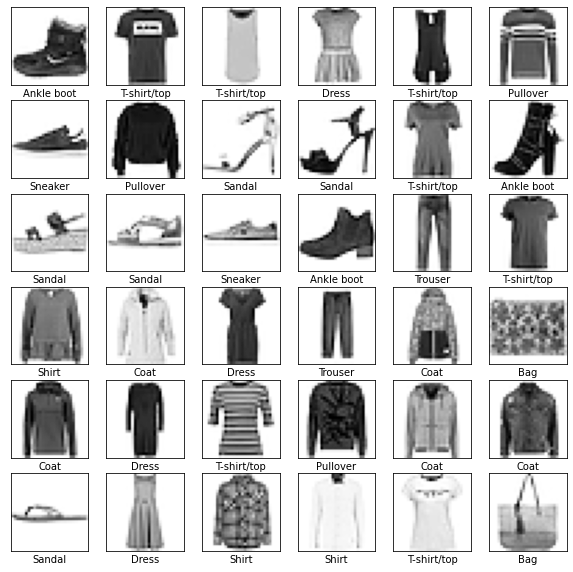

In [11]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

import matplotlib.pyplot as plt

def display_images(images,labels):
    fig = plt.figure(figsize=(10,10))
    for i in range(36):
      plt.subplot(6,6,i+1)
      plt.xticks([])
      plt.yticks([])
      plt.imshow(images[i], cmap="Greys")
      plt.xlabel(class_names[labels[i]])
    plt.show()

display_images(X_train_full_img[0:36], y_train_full[0:36])     

####  <span style="color:red"></span> Lets code the dense layer

We now develop a feed-forward neural networks with the architecture $784 \rightarrow 20(ReLU) \rightarrow 25(ReLU) \rightarrow 10(softmax)$. We first declare the code for the hidden layer with a linear operation and activation. Since we are implementing using TF 1.x syntax, we first import the compatible version of TF 1.x in TF 2.x.

In [12]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [13]:
import numpy as np

def dense_layer(x, num_neurons, name, activation=None):
    with tf.name_scope(name):
        num_inputs = int(x.get_shape()[1])
        stddev = 2 / np.sqrt(num_inputs)
        init = tf.truncated_normal([num_inputs, num_neurons], stddev=stddev)
        W = tf.Variable(init, name= "weights") 
        b = tf.Variable(tf.zeros([num_neurons]), name= "biases") 
        z = tf.matmul(x, W) + b 
    if activation == "sigmoid":
        return tf.nn.sigmoid(z) 
    elif activation == "relu":
        return tf.nn.relu(z) 
    else:
        return z

####  <span style="color:red"></span> Lets declare the network and visualize quantities of interest using TensorBoard


It is the time to implement our network with the architecture $784 \rightarrow 20(ReLU) \rightarrow 25(ReLU) \rightarrow 10(softmax)$. Note that we need to store and visualize the following quantities using TensorBoard:
- Gradients of trainable variables (weight matrices and biases) (Hint: use method `compute_gradients` with respect to the loss function). 
- Hidden layers 1 and 2.

In [14]:
num_hidden1 = 20
num_hidden2 = 25
num_outputs = 10
num_inputs = 784  #28 x 28

*Run the following cell to create necessary subfolders for this tasks.*

In [15]:
# Create necessary subfolders to store immediate files for this assignment.

import os
if not os.path.exists("./models/dnn0"):
    os.makedirs("models/dnn0")

In [16]:
inputs = tf.placeholder(tf.float32, shape=[None, num_inputs], name="inputs") 
labels = tf.placeholder(tf.int32, shape=[None], name="labels") 

with tf.name_scope("dnn"):
    hidden1 = dense_layer(inputs, num_hidden1, activation= tf.nn.relu, name= "hidden_layer1") 
    hidden2 = dense_layer(hidden1, num_hidden2, activation= tf.nn.relu, name= "hidden_layer2") 
    logits = dense_layer(hidden2, num_outputs, name="logits") 
    
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=labels, logits=logits, name='xentropy') 
    loss = tf.reduce_mean(xentropy, name="loss")
    
with tf.name_scope("evaluation"):
    correct = tf.nn.in_top_k(logits, labels, 1) 
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    
with tf.name_scope("train"):
    learning_rate = 0.001
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate) 
    grads = optimizer.compute_gradients(loss)
    training_op = optimizer.apply_gradients(grads)
    
    for var in tf.trainable_variables():
        tf.summary.histogram(var.op.name + "/values", var)
        
    for grad, var in grads:
        if grad is not None:
            tf.summary.histogram(var.op.name + "/gradients", grad)

# summary
accuracy_summary = tf.summary.scalar("accuracy", accuracy) 


In [17]:
# merge all summary
tf.summary.histogram('hidden1/activations', hidden1)
tf.summary.histogram('hidden2/activations', hidden2)
merged = tf.summary.merge_all() #Insert your code here

init = tf.global_variables_initializer()
saver = tf.train.Saver() #Insert your code here

train_writer = tf.summary.FileWriter("models/dnn0/train", tf.get_default_graph())
test_writer = tf.summary.FileWriter("models/dnn0/test", tf.get_default_graph())

num_epochs = 50
batch_size = 128

####  <span style="color:red"></span> Lets train our network and report the resutls, and inspect the computational graph and visualize the gradients, hidden layers 1,2

In [18]:
with tf.Session() as sess:
    init.run()
    print("Epoch\tTrain accuracy\tValid accuracy")
    for epoch in range(num_epochs):
        for idx_start in range(0, X_train.shape[0], batch_size):
            idx_end = min(X_train.shape[0], idx_start + batch_size) #Insert your code here
            X_batch, y_batch = X_train[idx_start:idx_end], y_train[idx_start:idx_end] #Insert your code here
            sess.run(training_op, feed_dict={inputs: X_batch, labels: y_batch})
            
        summary_train, acc_train = sess.run([merged, accuracy], feed_dict={inputs:X_train, labels:y_train}) #Insert your code here
        summary_valid, acc_valid = sess.run([merged, accuracy], feed_dict={inputs:X_valid, labels:y_valid}) #Insert your code here
        
        train_writer.add_summary(summary_train, epoch)
        test_writer.add_summary(summary_valid, epoch)
        
        print("{}\t{}\t{}".format(epoch, acc_train, acc_valid))

    save_path = saver.save(sess, "models/dnn0.ckpt")

Epoch	Train accuracy	Valid accuracy
0	0.8278889060020447	0.8274999856948853
1	0.8440555334091187	0.8414999842643738
2	0.8480555415153503	0.8414999842643738
3	0.8513333201408386	0.8426666855812073
4	0.8541296124458313	0.8451666831970215
5	0.8557962775230408	0.8456666469573975
6	0.8569814562797546	0.8458333611488342
7	0.857629656791687	0.8454999923706055
8	0.8582592606544495	0.8456666469573975
9	0.8589629530906677	0.846666693687439
10	0.859074056148529	0.8463333249092102
11	0.8591481447219849	0.847000002861023
12	0.8592963218688965	0.8460000157356262
13	0.8593518733978271	0.8460000157356262
14	0.8597962856292725	0.8456666469573975
15	0.8600184917449951	0.8453333377838135
16	0.860370397567749	0.8448333144187927
17	0.8608333468437195	0.8456666469573975
18	0.8612777590751648	0.8461666703224182
19	0.8616481423377991	0.8461666703224182
20	0.862407386302948	0.8453333377838135
21	0.8626111149787903	0.8460000157356262
22	0.8628148436546326	0.8458333611488342
23	0.8632037043571472	0.8460000157356

Lets use tesnorboard to visualzie the gradients of our model.

<span style="color:red">**YOU ARE REQUIRED TO INSERT YOUR OWN GRAPHICS IN THIS MARKDOWN CELL**</span>

* **Hidden activations**: 

First hidden layer | Second hidden layer
:-: | :-:
<img src="Question2_figures/hidden_layer1_activation.png" width="350" align="center"/> | <img src="Question2_figures/hidden_layer2_activation.png" width="350" align="center"/>
 
* **Parameter gradients**: 

First weight layer | Second weight layer | Last weight layer
:-: | :-: | :-:
<img src="Question2_figures/hidden_layer1_weights_gredients.png" width="350" align="center"/> | <img src="Question2_figures/hidden_layer2_weights_gredients.png" width="350" align="center"/> | <img src="Question2_figures/output_weights_gredients.png" width="350" align="center"/>
